IRIS 데이터분석

- 지도학습(종속변수 O = 정답 O)
- 분류(예측하려는 데이터 = 종속변수 = 범주형)




# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_iris

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, f1_score, recall_score, precision_score, precision_recall_curve, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

# LOAD DATASETS

- csv 파일이 있는 경우, pandas의 read_csv를 이용한다.

In [3]:
# iris = pd.read_csv('iris.csv')

- sklearn에서 제공하는 datasets을 이용해보려고 한다.

In [4]:
iris = load_iris()

In [5]:
iris.data.shape # 4개 컬럼, 150개의 데이터

(150, 4)

In [6]:
print(iris.target.shape, np.unique(iris.target)) # 타겟 변수는 150개 데이터, [0 1 2]로 분류됨

(150,) [0 1 2]


In [7]:
iris.feature_names # iris를 구분짓는 4가지 피쳐 - 독립변수

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names # iris 3종 - 종속변수

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# MAKE DATAFRAME

### 데이터프레임을 생성한다.
<pre>
위에서 datasets 확인 결과, iris를 분류할 기준은 4가지 feature이다.
각 데이터는 다음에서 얻을 수 있다.
- feature name :  iris.feature_names
- feature data :  iris.data
- target data : iris.target

이를 토대로 데이터프레임을 생성하면

In [9]:
cols = np.array(['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

In [10]:
df = pd.DataFrame(data=iris.data, columns= cols)
df['target'] = iris.target

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# 0,1,2종 50개씩 나란히 들어가 있다.
np.array(df['target'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# EDA

In [13]:
df.shape

(150, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- 데이터 결측 확인

In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

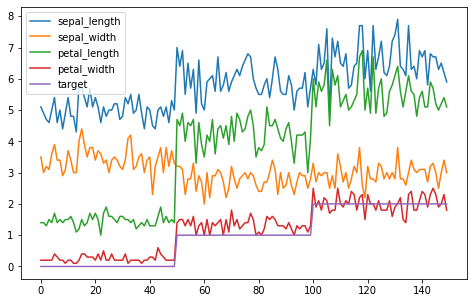

In [17]:
# 간단하게 plot을 출력해보자
df.plot(figsize=(8,5))
plt.show()

- iris 종별 데이터 확인

In [18]:
for i in range(3):
    print(f'target={i}')
    # print(f'- {i}종 특징값 최대 최소 -')
    for col in df.columns:
        
        print(col,df.loc[df['target']==i,col].min(), df.loc[df['target']==i,col].max())
    print(df[df['target']==i].head())
    print()
    

target=0
sepal_length 4.3 5.8
sepal_width 2.3 4.4
petal_length 1.0 1.9
petal_width 0.1 0.6
target 0 0
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

target=1
sepal_length 4.9 7.0
sepal_width 2.0 3.4
petal_length 3.0 5.1
petal_width 1.0 1.8
target 1 1
    sepal_length  sepal_width  petal_length  petal_width  target
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1

target=2
sepal_lengt

# 데이터 시각화

### 상관분석

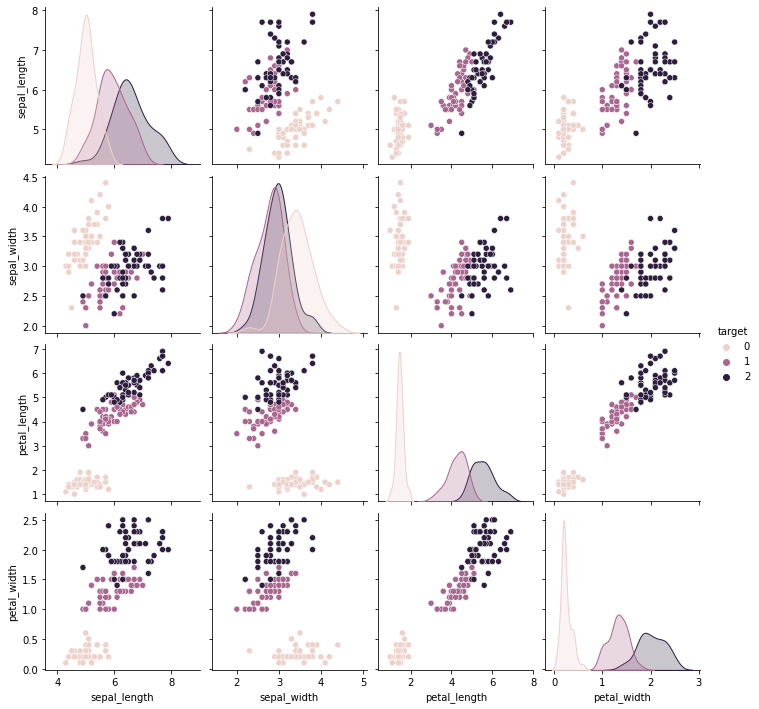

In [19]:
sns.pairplot(df, hue='target')
plt.show()

# petal_length와 petal_width로 0종이 단독 특징을 가진다.
# sepal_width는 종별 차이가 없다. 특히 2,3종은 아주 유사함.

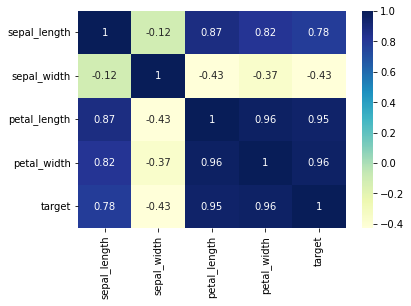

In [20]:
sns.heatmap(data=df.corr(),annot=True, cmap='YlGnBu')
plt.show()

# 데이터학습

### 분류 (Classification)

In [21]:
X= df.drop('target',axis=1)
y= df['target']

In [22]:
print(X.shape,y.shape)

(150, 4) (150,)


In [23]:
print(X, y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


- 학습 데이터 분할

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 36, shuffle= True)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [26]:
y_train[:5] # shuffled

10     0
3      0
13     0
116    2
75     1
Name: target, dtype: int32

- 모델 학습

In [27]:
dt= DecisionTreeClassifier(random_state=36)
dt.fit(X_train, y_train) 
dt_pred= dt.predict(X_test)
dt_proba= dt.predict_proba(X_test)

In [28]:
# 예측된 결과 샘플 확인
print(dt_pred[:5])
print(dt_proba[:5])

[1 2 1 2 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# 성능 평가(분류)
- ref: https://scikit-learn.org/stable/modules/model_evaluation.html

- accuracy_score(y_true, y_pred)
- precision_score(y_true, y_pred)
- recall_score(y_true, y_pred)
- f1_score(y_true, y_pred)
- confusion_matrix()
- classfication_report()
- fbeta_score(y_true, y_pred, beta)

In [29]:
def score(y_test,y_pred,proba):
    a = accuracy_score(y_test,y_pred)
    p = precision_score(y_test,y_pred, average='macro')
    r = recall_score(y_test,y_pred, average='macro')
    f1 = f1_score(y_test,y_pred, average='macro')

    # print(f'accuracy= {accuracy_score(y_test,y_pred)}')
    # print('precision= ',precision_score(y_test,y_pred, average='macro'))
    # print('recall= ',recall_score(y_test,pred, average='macro'))
    print(f'accuracy: {a: .6f}, precison: {p:.6f},recall: {r:.6f}, f1: {f1:.6f}')
    print(f' confusion_matrix \n {confusion_matrix(y_test,y_pred)}')
    print(roc_auc_score(y_test,proba,multi_class='ovo'))
    # return accuracy_score, precision_score, confusion_matrix, roc_auc_score



In [30]:
score(y_test,dt_pred,dt_proba)

accuracy:  0.966667, precison: 0.972222,recall: 0.969697, f1: 0.969634
 confusion_matrix 
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
0.9772727272727272


c:\it\workspace_python\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


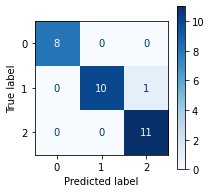

In [31]:
fig, ax =plt.subplots(figsize=(3,3))
plot_confusion_matrix(dt, X_test, y_test, labels=dt.classes_,cmap='Blues', ax=ax)
plt.show()

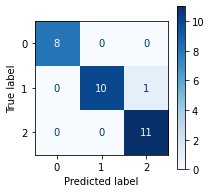

In [32]:
cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_).plot(cmap="Blues",ax=ax) 
plt.show()

In [33]:
report = classification_report(y_test, dt_pred, labels= dt.classes_)
print(report)
# 위에서 나온 점수와 결과값이 다름
# accuracy:  0.966667, precison: 0.962963,recall: 0.977778, f1: 0.968898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
y_p = dt_pred
y_t = y_test
print('예측값: ',y_p) 
print('실제값: ',np.array(y_t).flatten())
# diff = [idx for i,j in enumerate(zip)]
diff = [f'index={idx},예측값={pred},실제값={true}' for idx, (pred,true) in enumerate(zip(y_p,y_t)) if pred!=true ]
diff

예측값:  [1 2 1 2 2 1 1 1 1 1 1 0 2 1 0 0 0 2 0 2 0 2 2 0 2 2 0 2 1 2]
실제값:  [1 2 1 2 2 1 1 1 1 1 1 0 2 1 0 0 0 1 0 2 0 2 2 0 2 2 0 2 1 2]


['index=17,예측값=2,실제값=1']

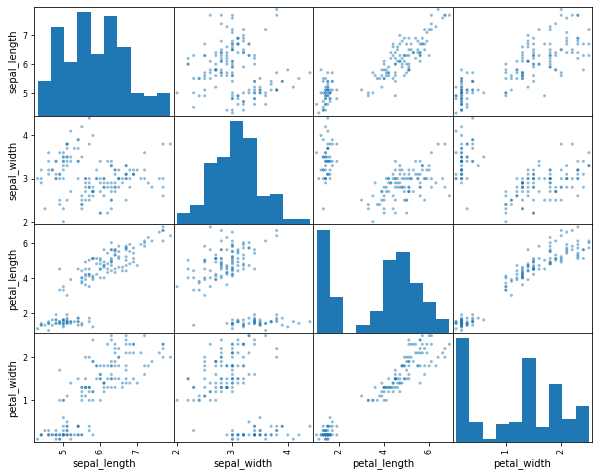

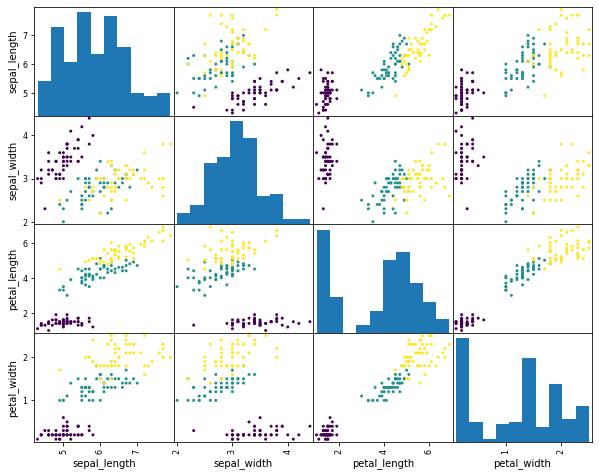

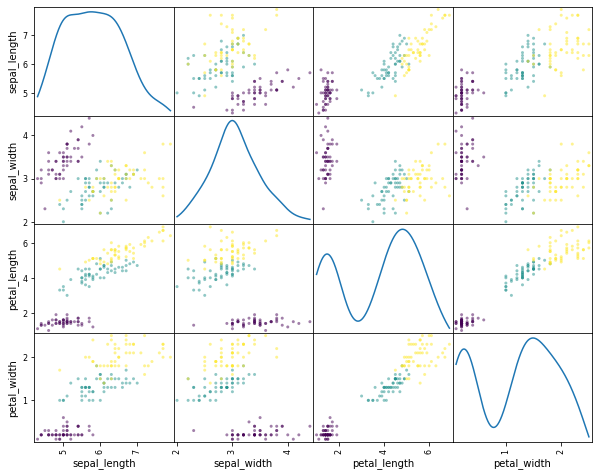

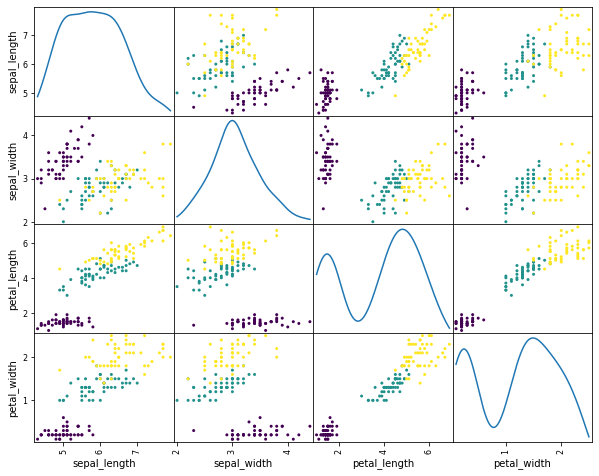

In [35]:
# 파라미터로 설정에 따라 다른 결과

from pandas.plotting import scatter_matrix
# parameter 설정에 따라 다른 결과
scatter_matrix(X, figsize=(10,8)) 
scatter_matrix(X, c=y, figsize=(10,8),alpha=1) 
scatter_matrix(X, c=y, figsize=(10,8),diagonal='kde') 
scatter_matrix(X, c=y, figsize=(10,8),diagonal='kde',alpha=1) 

plt.show()

In [36]:
# temp_test_df = X_test.copy()
# temp_test_df["target"] = y_test
# print(temp_test_df.shape)

# sns.set_theme(style="ticks")
# sns.pairplot(temp_test_df, hue="target")
# plt.show()

### iris에서는 linearRegression, LogisticRegression 둘다 불가?
linear는 회귀라고 치고, logistic은 분류 아닌지
사용하지 않는지 이전 코드 확인

In [37]:
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# rf_pred = rf.predict(X_test)
# rf_proba = rf.predict_proba(X_test)
# score(y_test,rf_pred,rf_proba)
# # decisiontree와 모든 점수가 똑같은데 roc auc score가 1이 나왔다.

# 검증

### KFOLD

In [38]:
N_SPLIT = 5 # Kfold 개수 지정
kfold = KFold(n_splits=N_SPLIT, shuffle=True, random_state= 36)
scores= [] # 점수 담을 리스트 생성

In [39]:
kfold

KFold(n_splits=5, random_state=36, shuffle=True)

In [40]:
for train_index,test_index in kfold.split(df): # kfold.split안에 X를 놓든 df를 놓든 150을 120/30으로 나눈다.
    print('train: ', len(train_index), 'test: ', len(test_index))

train:  120 test:  30
train:  120 test:  30
train:  120 test:  30
train:  120 test:  30
train:  120 test:  30


In [41]:
for train_index,test_index in kfold.split(df):
    print('train: ', train_index, 'test: ', test_index)

train:  [  0   1   2   3   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  30  31  32  33  34  36  37  38  39  40  41
  43  44  45  46  47  49  52  53  54  55  58  60  61  62  63  64  65  67
  68  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  87  88
  89  90  91  92  93  95  97  98  99 100 101 103 104 105 106 107 108 109
 111 112 113 114 116 117 119 120 121 123 124 126 127 129 130 132 133 134
 135 136 137 138 139 140 141 142 143 144 148 149] test:  [  4  14  27  28  29  35  42  48  50  51  56  57  59  66  69  77  86  94
  96 102 110 115 118 122 125 128 131 145 146 147]
train:  [  0   1   4   5   6   7   8   9  11  14  16  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  35  36  37  38  40  42  43  44  45
  47  48  49  50  51  54  55  56  57  58  59  60  62  64  66  67  68  69
  70  72  74  77  78  79  80  81  82  83  85  86  87  88  89  90  91  92
  93  94  95  96  98 100 101 102 103 105 106 107 108 109 110 113 115 117
 

In [42]:
N_SPLIT = 5 # Kfold 개수 지정
kfold = KFold(n_splits=N_SPLIT, shuffle=True, random_state= 36)
scores= [] # 점수 담을 리스트 생성

for n_fold,(train_index, test_index) in enumerate(kfold.split(df)):  #-----------KFold
    # print("TRAIN:", len(train_index) , "TEST:", len(test_index)) 
    print(f'FOLD : {n_fold}')
    X_train, X_test = df.iloc[train_index,:-1], df.iloc[test_index,:-1]
    y_train, y_test = df.iloc[train_index,-1], df.iloc[test_index,-1] 
    print(y_train.value_counts())

    dt.fit(X_train,y_train)  # fold마다 학습
    pred = dt.predict(X_test)
    proba = dt.predict_proba(X_test)
    f1 = f1_score(y_test, pred, average='macro')
    scores.append(f1)
    print(f'F1 : {f1:.6f}\n')
print(f'{N_SPLIT}회 평균 F1 SCORE : {np.array(scores).mean():.6f}')

FOLD : 0
0    42
1    39
2    39
Name: target, dtype: int64
F1 : 0.969634

FOLD : 1
2    43
0    39
1    38
Name: target, dtype: int64
F1 : 1.000000

FOLD : 2
0    41
1    40
2    39
Name: target, dtype: int64
F1 : 0.968254

FOLD : 3
1    43
2    39
0    38
Name: target, dtype: int64
F1 : 0.922078

FOLD : 4
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583

5회 평균 F1 SCORE : 0.965310


### StratifiedKFold

< KFold와 SKFold 차이점 >
<pre>
KFold.split() ----> def split(X, y=None, groups=None)
StratifiedKFold.split() --->     def split(X, y, groups=None)

In [43]:
N_SPLIT = 5 
skfold = StratifiedKFold(n_splits=N_SPLIT, shuffle=True, random_state= 336)
scores= [] # 점수 담을 리스트 생성

for n_fold,(train_index, test_index) in enumerate(skfold.split(X,y)):  #-----------KFold
    print("TRAIN:", len(train_index) , "TEST:", len(test_index)) 
#     print(f'FOLD : {n_fold}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    print(y_train.value_counts())
    
    dt.fit(X_train,y_train)  # fold마다 학습
    pred = dt.predict(X_test)
    # proba = dt.predict_proba(X_test)
    f1 = f1_score(y_test, pred, average='macro')
    scores.append(f1)
    print(f'F1 : {f1:.6f}\n')
print(f'{N_SPLIT}회 평균 F1 SCORE : {np.array(scores).mean():.6f}')

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.933333

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.897698

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 1.000000

5회 평균 F1 SCORE : 0.952840


### cross_val_score

In [44]:
scores = cross_val_score(dt, X, y, scoring='f1_macro',cv=5)
print(scores)
print(f'F1 : {np.array(scores).mean()}')

scores2 = cross_val_score(dt, X, y, scoring='f1_macro',cv=kfold)
print(scores2)
print(f'F1 : {np.array(scores2).mean()}')

scores3 = cross_val_score(dt, X, y, scoring='f1_macro',cv=skfold)
print(scores3)
print(f'F1 : {np.array(scores3).mean()}')
# F1 : 0.9598997493734336
# F1 : 0.9653098490627094
# F1 : 0.9528395584015452


[0.96658312 0.96658312 0.89974937 0.96658312 1.        ]
F1 : 0.9598997493734336
[0.96963423 1.         0.96825397 0.92207792 0.96658312]
F1 : 0.9653098490627094
[0.96658312 0.93333333 0.96658312 0.89769821 1.        ]
F1 : 0.9528395584015452


파라미터 cv에 숫자와 kfold, skfold를 넣어 비교한 결과
- kfold > 숫자 > skfold 순으로 점수가 좋았다
- kfold와 skfold는 shuffle 되어있다.
